In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df=pd.read_csv('Heart.csv')

In [30]:
df.head()

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


a) Find Shape of Data 

In [31]:
df.shape

(303, 15)

b) Find Missing Values and Handle missing values

In [32]:
df.isnull().sum()

Unnamed: 0    0
Age           0
Sex           0
ChestPain     0
RestBP        0
Chol          0
Fbs           0
RestECG       0
MaxHR         0
ExAng         0
Oldpeak       0
Slope         0
Ca            4
Thal          2
AHD           0
dtype: int64

In [33]:
df['Ca'].unique()

array([ 0.,  3.,  2.,  1., nan])

In [57]:
df['Ca'] = df.Ca.astype(object)
df['Ca'].dtype

dtype('O')

In [35]:
df['Ca'].fillna(df['Ca'].mode()[0],inplace=True)

In [36]:
df['Ca'].isnull().sum()

0

In [44]:
df['Thal'].mode()[0]

'normal'

In [45]:
df['Thal'].fillna(df['Thal'].mode()[0],inplace=True)
df['Thal'].isnull().sum()

0

c) Find data type of each column 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          303 non-null    float64
 13  Thal        303 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


d) Finding out Zero's 

In [47]:
(df==0).sum()

Unnamed: 0      0
Age             0
Sex            97
ChestPain       0
RestBP          0
Chol            0
Fbs           258
RestECG       151
MaxHR           0
ExAng         204
Oldpeak        99
Slope           0
Ca            180
Thal            0
AHD             0
dtype: int64

e) Find Mean age of patients 

In [48]:
df['Age'].mean()

54.43894389438944

Text(0, 0.5, 'Cholesterol Level')

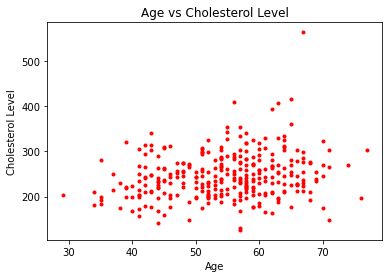

In [69]:
plt.scatter(df['Age'],df['Chol'],color='red',s=9)
plt.title('Age vs Cholesterol Level')
plt.xlabel('Age')
plt.ylabel('Cholesterol Level')


Text(0, 0.5, 'Maximum Heart Rate')

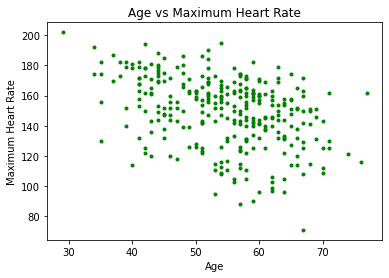

In [123]:
plt.scatter(df['Age'],df['MaxHR'],color='g',s=9)
plt.title('Age vs Maximum Heart Rate')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')


Text(0, 0.5, 'Count')

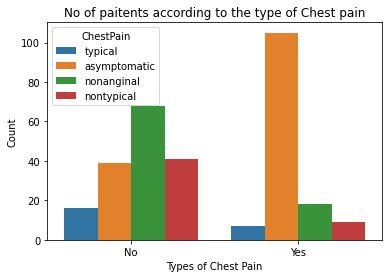

In [124]:
sns.countplot(df['AHD'],hue=df['ChestPain'])
plt.title('No of paitents according to the type of Chest pain')
plt.xlabel('Types of Chest Pain')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

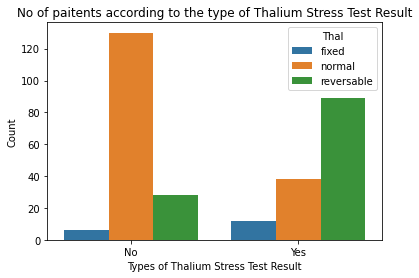

In [125]:
sns.countplot(df['AHD'],hue=df['Thal'])
plt.title('No of paitents according to the type of Thalium Stress Test Result')
plt.xlabel('Types of Thalium Stress Test Result')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

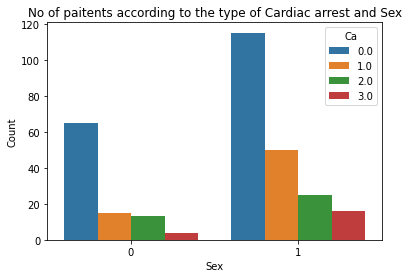

In [126]:
sns.countplot(df['Sex'],hue=df['Ca'])
plt.title('No of paitents according to the type of Cardiac arrest and Sex')
plt.xlabel('Sex')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

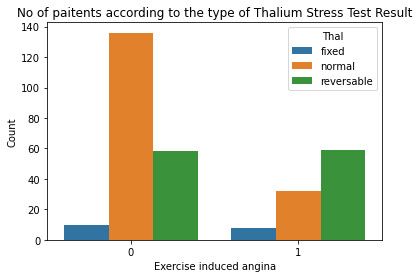

In [127]:
sns.countplot(df['ExAng'],hue=df['Thal'])
plt.title('No of paitents according to the type of Thalium Stress Test Result')
plt.xlabel('Exercise induced angina')
plt.ylabel('Count')

Text(0.5, 1.0, 'Chestpain vs Chol')

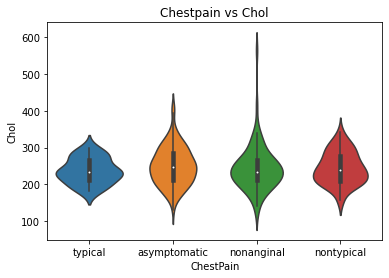

In [129]:
sns.violinplot(x="ChestPain", y="Chol", data=df)
plt.title('Chestpain vs Chol')

Text(0, 0.5, 'Count')

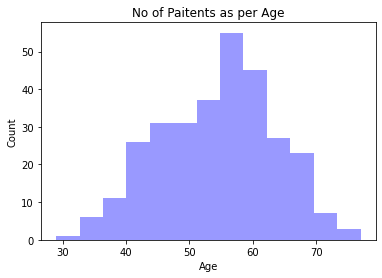

In [135]:
sns.distplot(df['Age'],kde = False,color='blue')
plt.title('No of Paitents as per Age')
plt.ylabel('Count')

f) Now extract only Age, Sex, ChestPain, RestBP, Chol. Randomly divide dataset in training (75%) and testing (25%). 

In [113]:
X=df.iloc[:,1:6]

In [114]:
X.head()

,Age,Sex,ChestPain,RestBP,Chol
0,63,1,typical,145,233
1,67,1,asymptomatic,160,286
2,67,1,asymptomatic,120,229
3,37,1,nonanginal,130,250
4,41,0,nontypical,130,204


In [115]:
y=df['AHD']
y.head()

0     No
1    Yes
2    Yes
3     No
4     No
Name: AHD, dtype: object

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [118]:
X_train.shape

(227, 5)

In [119]:
X_test.shape

(76, 5)

In [132]:
y_train.shape

(227,)

In [133]:
y_test.shape

(76,)